In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


/var/folders/tz/nj1np8hj5sn9b_q8m1628ssr0000gn/T/ipykernel_47139/4094721385.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Count # of Cognaes between each pair of languages

In [2]:
sed = pd.read_csv('Scrapers/sed.tsv', sep='\t', dtype={'ID': str})
data = sed.copy()
sed

,ID,DOCULECT,CONCEPT,VALUE,TOKENS,NOTE,COGID
0,NaN,PS,dog,*kalb-,NaN,(SED II No. 115),1
1,1,Akkadian,dog,kalbu,NaN,"(CAD 68, AHw. 424)",1
2,3,Ugaritic,dog,klb,NaN,(DUL 439),1
3,6486,Phoenician,dog,klb,NaN,(Tomback 1978: 192),1
4,474,Hebrew,dog,käläb,NaN,(HALOT 476),1
...,...,...,...,...,...,...,...
18432,28320,Jibbali,to wean,ˁárɔ́ẓ̂,NaN,(JL 15),2151
18433,3306,Soqotri,1. to wean; 2. to stop watering,ˁéraẓ̂,NaN,(LS 329; CSOL I 498; CSOL II 416; Naumkin et a...,2151
18434,NaN,Proto-MSA,to drown,*γrḳ,NaN,(LS 329),2152
18435,28322,Mehri,to drown,γáyrəḳ,NaN,(ML 141),2152


In [3]:

# take only cognates that appear in Proto-Semitic (PS)
# group by COGID and check if PS is in the list of languages, if not, drop the cognate, if yes, keep it
data = data.groupby('COGID').filter(lambda x: 'PS' in x['DOCULECT'].values)

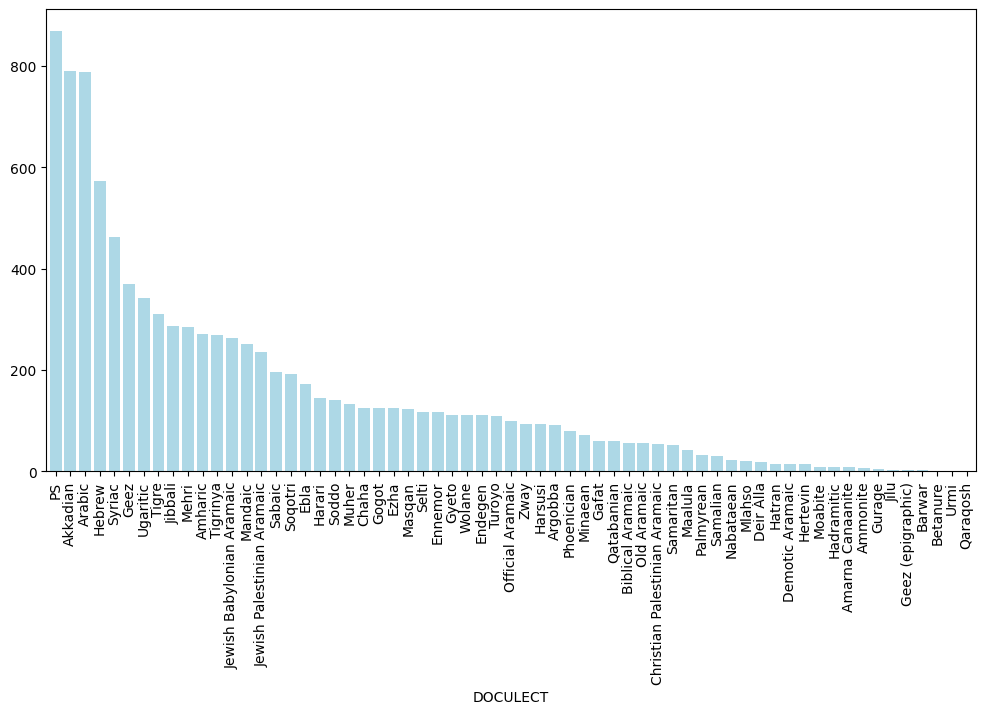

In [4]:

# count cognates for each DOCULECT, sort by size and take the index
languages = data.groupby("DOCULECT").size().sort_values(ascending=False)
plt.figure(figsize=(12, 6))  

languages.plot(kind='bar', color='lightblue', width=0.8)    
plt.xticks(rotation=90)
plt.show()

In [ ]:
# # take the top 10 languages
# languages = languages.head(10)
# data = data[data["DOCULECT"].isin(languages.index)]

# Create an empty matrix filled with zeros
cognate_matrix = pd.DataFrame(index=languages.index, columns=languages.index, data=0)

# Iterate through each COGID group
for cogid, group in data.groupby("COGID"):
  # Extract languages for this cognate group
  group_languages = group["DOCULECT"].tolist()

  # Update the cognate matrix for each language pair in the group
  for i in range(len(group_languages)):
    for j in range(i, len(group_languages)):
      cognate_matrix.loc[group_languages[i], group_languages[j]] += 1
      # Fill the lower triangle of the matrix for symmetry
      cognate_matrix.loc[group_languages[j], group_languages[i]] = cognate_matrix.loc[group_languages[i], group_languages[j]]



In [16]:
#print the "PS" row fully, without the ...
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(cognate_matrix["PS"])

DOCULECT
PS                               869
Akkadian                         791
Arabic                           789
Hebrew                           574
Syriac                           462
Geez                             370
Ugaritic                         342
Tigre                            311
Jibbali                          287
Mehri                            285
Amharic                          271
Tigrinya                         269
Jewish Babylonian Aramaic        263
Mandaic                          251
Jewish Palestinian Aramaic       235
Sabaic                           195
Soqotri                          193
Ebla                             172
Harari                           144
Soddo                            140
Muher                            133
Chaha                            125
Gogot                            125
Ezha                             125
Masqan                           122
Selti                            117
Ennemor                      

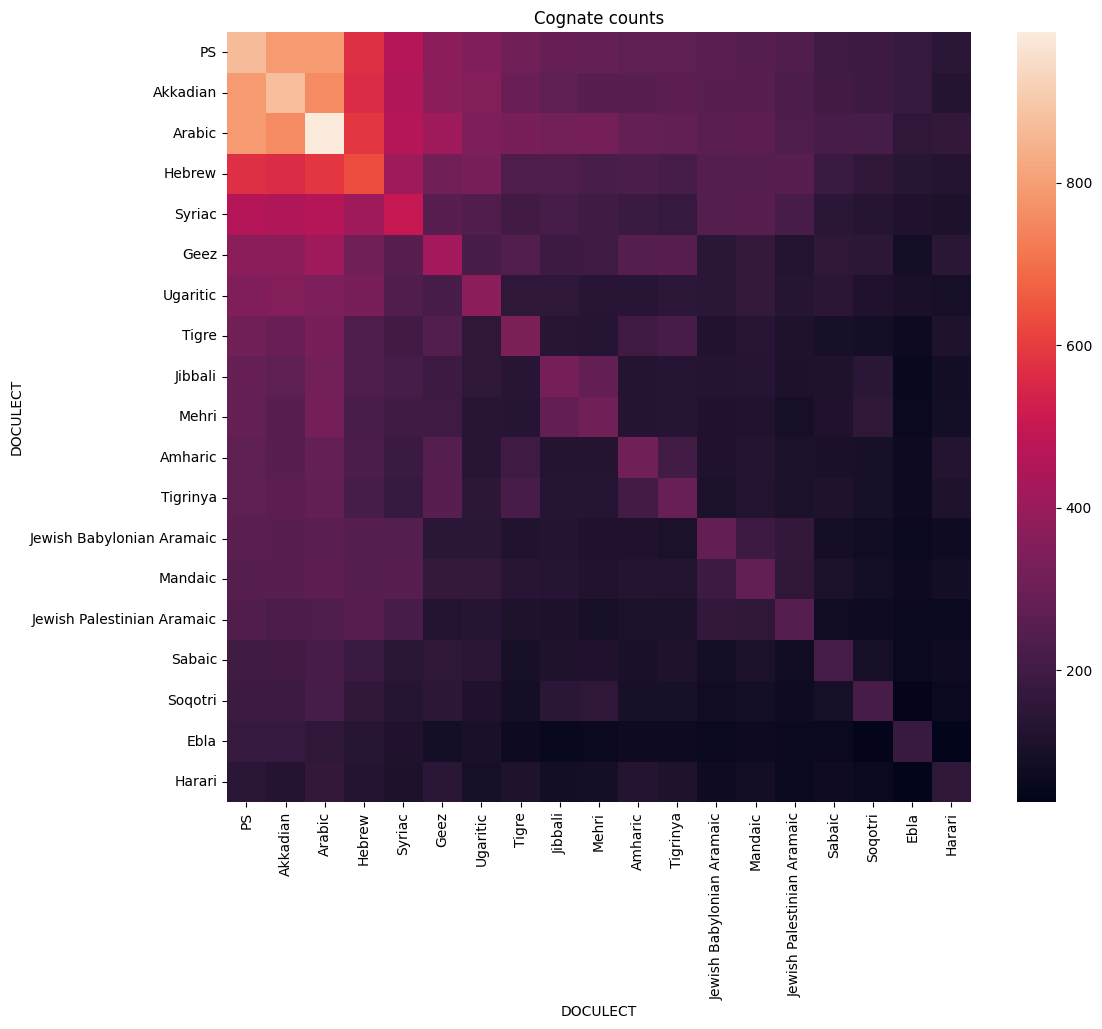

In [6]:
# take a submatrix of the top 10 languages
n = 19
top_n = cognate_matrix.loc[languages.index[:n], languages.index[:n]]
plt.figure(figsize=(12, 10))
# plot the matrix as a heatmap, use a diverging color palette
sns.heatmap(top_n)

# make the plot prettier and more readable
plt.title("Cognate counts")
plt.show()


# Count number of arabic words with low representation in other languages

In [7]:
# group by cogID and take groups that contain Arabic as a DOCULECT
# and have at most 5 languages
n = 5
sed.groupby('COGID').filter(lambda x: x['DOCULECT'].str.contains('Arabic').any() and len(x) <= n)

,ID,DOCULECT,CONCEPT,VALUE,TOKENS,NOTE,COGID
938,NaN,PS,to be dark,*γṯy,NaN,"(Kogan 2015: 34, note 66; Kogan 2001: 266)",49
939,164,Akkadian,"to be troubled, blurred or dark",ešû,NaN,"(CAD E 378, AHw. 259)",49
940,165,Arabic,to be clouded; to be confused,γṯy,NaN,(Lane 2230),49
1209,NaN,PS,to lick,*lḥš,NaN,(CDG 311),63
1210,7923,Akkadian,"to taste, to lick",lâšu,NaN,"(CAD L 111, AHw. 540)",63
...,...,...,...,...,...,...,...
18372,27783,Arabic,a thing made obligatory or binding by God,farḍ-,NaN,(Lane 2374),2140
18425,NaN,PWS,"to cleave, to slit",ˁḳḳ,NaN,(SEDonline),2149
18426,1721,Ugaritic,a destructive one,ˁḳḳ,NaN,(DUL 177),2149
18427,1722,Arabic,"to split, to rip, to cut",ˁqq,NaN,(Lane 2095),2149


<Axes: xlabel='DOCULECT'>

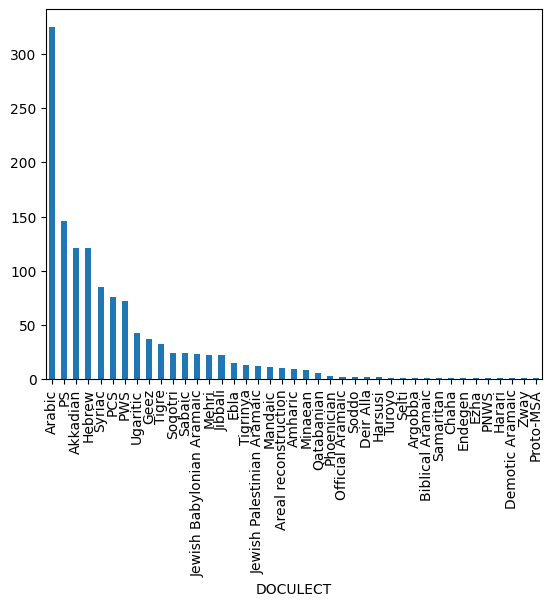

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

def num_cognates(n):
    filtered_cogs = sed.groupby('COGID').filter(lambda x: x['DOCULECT'].str.contains('Arabic').any() and len(x) <= n)
    return len(filtered_cogs['COGID'].unique())

def arabic_cognates(n):
    return sed.groupby('COGID').filter(lambda x: x['DOCULECT'].str.contains('Arabic').any() and len(x) <= n)

arabic_cognates(5).DOCULECT.value_counts().plot(kind='bar')

# arabic_cognates(5).to_csv('low_represented_arabic_roots.tsv', sep='\t', index=False)